## Importing the libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [45]:
from Preprocessor5 import get_single_dataset
from Preprocessor5 import get_combined_dataset
training_set = get_combined_dataset("training_data/Typ2_intrapoliert/training", 1, 12)
X_train = training_set.iloc[:, 1:].values
y_train = training_set.iloc[:, 0].values
test_set =  get_single_dataset("training_data/Typ1_intrapoliert1/test")
X_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values

## Training the Decision Tree Regression model

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results on independent test set

In [47]:
y_pred = regressor.predict(X_test)

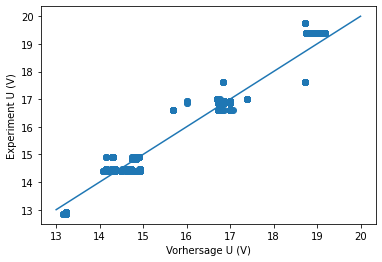

In [48]:
plt.scatter(y_pred, y_test)
plt.xlabel("Vorhersage U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9314980984083778

In [50]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.5120205508863955


In [51]:
z = np.arange(1, 2766)

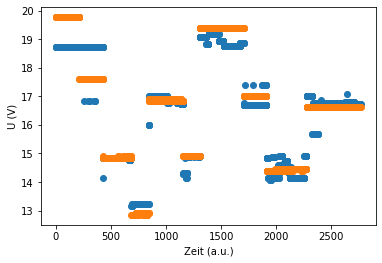

In [52]:
plt.scatter(z, y_pred)
plt.scatter(z, y_test)
plt.xlabel("Zeit (a.u.)")
plt.ylabel("U (V)")
plt.show()

In [118]:
b = np.array([[z,y_pred,y_test]])

In [123]:
b_neu = b.reshape((3,2765))

In [124]:
print(b_neu)

[[1.00000000e+00 2.00000000e+00 3.00000000e+00 ... 2.76300000e+03
  2.76400000e+03 2.76500000e+03]
 [1.87299971e+01 1.87299971e+01 1.87299971e+01 ... 1.67464390e+01
  1.67464390e+01 1.67464390e+01]
 [1.97692310e+01 1.97692310e+01 1.97692310e+01 ... 1.66153850e+01
  1.66153850e+01 1.66153850e+01]]


In [125]:
b_trans_neu = b_neu.transpose()

In [126]:
print(b_trans_neu)

[[1.00000000e+00 1.87299971e+01 1.97692310e+01]
 [2.00000000e+00 1.87299971e+01 1.97692310e+01]
 [3.00000000e+00 1.87299971e+01 1.97692310e+01]
 ...
 [2.76300000e+03 1.67464390e+01 1.66153850e+01]
 [2.76400000e+03 1.67464390e+01 1.66153850e+01]
 [2.76500000e+03 1.67464390e+01 1.66153850e+01]]


In [127]:
np.savetxt('b_neu_transpose.csv',b_trans_neu,delimiter=',')